In [ ]:
#PROJECT ONE 

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy import stats
from scipy.stats import linregress
import json
import csv
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy
import seaborn as sns
%matplotlib inline
from pandas.api.types import is_numeric_dtype

In [176]:
output_data2=pd.read_excel("Pitchbook1.xlsx", sheet_name=1)
output_data2

,Company ID,Company Name,Company Former Name,Company Also Known As,Competitors,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,...,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source,Last Updated Date,Last Known Valuation,Last Known Valuation Date,Last Known Valuation Deal Type,PitchBook Link
0,63996-58,Zyvex Technologies,Zyvex Performance Materials,NaN,"Nanocomp Technologies, Veloxint, Nanophase Tec...",63996-58,Developer of nano-engineered materials designe...,Business Products and Services (B2B),Commercial Products,Industrial Supplies and Parts,...,0.00,NaN,NaN,NaN,PitchBook Research,2019-01-30,NaN,NaT,NaN,View company online
1,60184-09,Zyomed,NaN,NaN,"DexCom, Senseonics, Abbott, Medtronic, Edwards...",60184-09,Developer of non-invasive sensors designed to ...,Healthcare,Healthcare Devices and Supplies,Diagnostic Equipment,...,0.00,NaN,NaN,NaN,PitchBook Research,2019-05-09,132.61,2016-05-17,Early Stage VC,View company online
2,162693-55,Zylo,NaN,NaN,"Cincom Systems, Boomerang Commerce, CloudCheck...",162693-55,Provider of a platform designed to optimize cl...,Business Products and Services (B2B),Commercial Services,Media and Information Services (B2B),...,0.00,1451.0,7.0,0.48,PitchBook Research,2019-01-09,29.30,2018-01-23,Early Stage VC,View company online
3,52214-95,Zya,NaN,NaN,NaN,52214-95,Developer of a mobile based music creation sof...,Consumer Products and Services (B2C),Media,"Movies, Music and Entertainment",...,0.00,5622.0,-6.0,-0.11,PitchBook Research,2019-06-06,12.56,2016-01-12,Convertible Debt,View company online
4,179431-57,Zunum Aero,NaN,NaN,NaN,179431-57,Developer of commercial hybrid-to-electric air...,Consumer Products and Services (B2C),Transportation,Air,...,NaN,2266.0,13.0,0.58,PitchBook Research,2019-06-06,NaN,NaT,NaN,View company online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,98400-25,3Bar Biologics,NaN,NaN,NaN,98400-25,Developer of a microbe inoculant system design...,Healthcare,Pharmaceuticals and Biotechnology,Biotechnology,...,0.61,48.0,0.0,0.00,PitchBook Research,2019-04-23,5.50,2017-08-16,Early Stage VC,View company online
1993,169555-60,2Sens,NaN,NaN,NaN,169555-60,Developer of real time video processing techno...,Information Technology,Software,Multimedia and Design Software,...,NaN,NaN,NaN,NaN,PitchBook Research,2018-09-08,NaN,NaT,NaN,View company online
1994,56463-04,2beans,NaN,2|beans,NaN,56463-04,Operator of a chocolate and coffee outlet. The...,Consumer Products and Services (B2C),Consumer Non-Durables,Beverages,...,5.13,433.0,0.0,0.00,PitchBook Research,2018-09-08,NaN,NaT,NaN,View company online
1995,56695-78,2-B Energy,NaN,2-B,NaN,56695-78,Developer of wind turbine generators and power...,Energy,Energy Equipment,Alternative Energy Equipment,...,NaN,NaN,NaN,NaN,PitchBook Research,2018-12-14,2.33,2008-05-22,Buyout/LBO,View company online


In [177]:
print(list(output_data2.columns))

['Company ID', 'Company Name', 'Company Former Name', 'Company Also Known As', 'Competitors', 'PBId', 'Description', 'Primary Industry Sector', 'Primary Industry Group', 'Primary Industry Code', 'All Industries', 'Verticals', 'Keywords', 'Company Financing Status', 'Total Raised', 'Business Status', 'Ownership Status', 'Universe', 'Website', 'Employees', 'Employee History', 'Exchange', 'Ticker', 'Year Founded', 'Parent Company', 'Daily Updates', 'Weekly Updates', 'Revenue', 'Gross Profit', 'Net Income', 'Enterprise Value', 'EBITDA', 'Fiscal Period', 'EBIT', 'Market Cap', 'Net Debt', 'Primary Contact PBId', 'Primary Contact', 'Primary Contact Title', 'Primary Contact Email', 'Primary Contact Phone', 'HQ Location', 'HQ Address Line 1', 'HQ Address Line 2', 'HQ City', 'HQ State/Province', 'HQ Post Code', 'HQ Country', 'HQ Phone', 'HQ Fax', 'HQ Email', 'HQ Global Region', 'HQ Global Sub Region', 'Financing Status Note', 'Active Investors', '# Active Investors', 'Acquirers', 'Former Investo

In [178]:
output_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Columns: 135 entries, Company ID to PitchBook Link
dtypes: datetime64[ns](5), float64(58), object(72)
memory usage: 2.1+ MB


In [179]:
output_data2.describe()

,Total Raised,Employees,Exchange,Ticker,Year Founded,Revenue,Gross Profit,Net Income,Enterprise Value,EBITDA,...,SimilarWeb Unique Visitors,SimilarWeb Unique Visitors Change,SimilarWeb Unique Visitors % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Last Known Valuation
count,1783.000000,1559.000000,0.0,0.0,1921.000000,436.000000,47.000000,94.000000,9.000000,65.000000,...,1.417000e+03,1417.000000,1417.000000,1581.000000,1581.000000,1581.000000,1.653000e+03,1653.000000,1653.000000,1194.000000
mean,91.642148,179.046825,NaN,NaN,2010.216033,210.285252,66.172128,6.419574,2823.397778,2.774154,...,8.823767e+04,716.581510,1.546260,1445.512966,6.207464,0.538216,2.657157e+04,19.611615,0.454586,411.218174
std,627.794061,801.700823,NaN,NaN,5.617557,1981.976405,167.067177,250.915748,4682.061145,70.578641,...,6.548275e+05,12279.176484,11.300261,9057.039858,55.262412,4.975959,2.784248e+05,134.816557,1.788134,4473.573378
min,0.000000,1.000000,NaN,NaN,1959.000000,0.000000,-8.370000,-1166.200000,-2.620000,-371.800000,...,3.900000e+01,-120508.000000,-53.330000,1.000000,-380.000000,-54.550000,1.000000e+00,-1280.000000,-4.430000,0.330000
25%,7.985000,18.000000,NaN,NaN,2008.000000,4.507500,2.965000,-6.847500,234.950000,-4.730000,...,5.060000e+02,-27.000000,-2.110000,58.000000,-1.000000,-0.240000,3.540000e+02,0.000000,0.000000,20.880000
50%,24.840000,48.000000,NaN,NaN,2012.000000,16.740000,7.170000,-2.020000,342.440000,-0.120000,...,1.889000e+03,40.000000,2.980000,193.000000,0.000000,0.000000,1.313000e+03,1.000000,0.070000,62.850000
75%,67.750000,120.000000,NaN,NaN,2014.000000,70.650000,29.205000,0.062500,3237.670000,1.700000,...,8.831000e+03,238.000000,7.880000,617.000000,1.000000,0.530000,4.584000e+03,6.000000,0.370000,185.285000
max,23400.000000,17300.000000,NaN,NaN,2019.000000,40000.000000,756.450000,2100.000000,14296.220000,308.900000,...,1.309128e+07,312157.000000,24.360000,247580.000000,1288.000000,100.000000,7.900356e+06,2142.000000,42.110000,150000.000000


In [180]:
# Count number of missing values per column
missingCount = output_data2.isnull().sum()
missingCount

Company ID                           0
Company Name                         0
Company Former Name               1512
Company Also Known As             1629
Competitors                        696
                                  ... 
Last Updated Date                    0
Last Known Valuation               803
Last Known Valuation Date          804
Last Known Valuation Deal Type     803
PitchBook Link                       0
Length: 135, dtype: int64

In [181]:
# Calculate total number of cells in dataframe
totalCells = np.product(output_data2.shape)

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The output_data2 dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The output_data2 dataset contains 34.17 % missing values.


In [182]:
output_data1=output_data2[['Company Name', 
                           'Primary Industry Code','Primary Industry Sector',
                           'Primary Industry Group',
                           'Verticals', 
                           'Total Raised','Year Founded',
                           'HQ Location','HQ Country',
                           'HQ Global Region', 
                           'Active Investors','# Active Investors','First Financing Date',
                           'First Financing Size','First Financing Deal Type', 
                           'First Financing Deal Class',
                           'Last Financing Date','Last Financing Size',
                           'Last Financing Deal Type',
                           'Last Financing Deal Class','Growth Rate','Growth Rate Percentile',
                            'Web Growth Rate','Web Growth Rate Percentile',
                           'Social Growth Rate','Social Growth Rate Percentile','Twitter Growth Rate',
                           'Twitter Growth Rate Percentile','Twitter Followers']]

In [183]:
output_data1.columns

Index(['Company Name', 'Primary Industry Code', 'Primary Industry Sector',
       'Primary Industry Group', 'Verticals', 'Total Raised', 'Year Founded',
       'HQ Location', 'HQ Country', 'HQ Global Region', 'Active Investors',
       '# Active Investors', 'First Financing Date', 'First Financing Size',
       'First Financing Deal Type', 'First Financing Deal Class',
       'Last Financing Date', 'Last Financing Size',
       'Last Financing Deal Type', 'Last Financing Deal Class', 'Growth Rate',
       'Growth Rate Percentile', 'Web Growth Rate',
       'Web Growth Rate Percentile', 'Social Growth Rate',
       'Social Growth Rate Percentile', 'Twitter Growth Rate',
       'Twitter Growth Rate Percentile', 'Twitter Followers'],
      dtype='object')

In [184]:
#printing data types
output_data1.dtypes

Company Name                              object
Primary Industry Code                     object
Primary Industry Sector                   object
Primary Industry Group                    object
Verticals                                 object
Total Raised                             float64
Year Founded                             float64
HQ Location                               object
HQ Country                                object
HQ Global Region                          object
Active Investors                          object
# Active Investors                       float64
First Financing Date              datetime64[ns]
First Financing Size                     float64
First Financing Deal Type                 object
First Financing Deal Class                object
Last Financing Date               datetime64[ns]
Last Financing Size                      float64
Last Financing Deal Type                  object
Last Financing Deal Class                 object
Growth Rate         

In [185]:
output_data1.isnull().sum()

Company Name                        0
Primary Industry Code               2
Primary Industry Sector             2
Primary Industry Group              2
Verticals                          93
Total Raised                      214
Year Founded                       76
HQ Location                         4
HQ Country                          4
HQ Global Region                    4
Active Investors                   37
# Active Investors                 37
First Financing Date              314
First Financing Size              671
First Financing Deal Type           0
First Financing Deal Class          0
Last Financing Date               207
Last Financing Size               569
Last Financing Deal Type            0
Last Financing Deal Class           9
Growth Rate                        82
Growth Rate Percentile             82
Web Growth Rate                   185
Web Growth Rate Percentile        185
Social Growth Rate                320
Social Growth Rate Percentile     320
Twitter Grow

In [186]:
#checking if there are duplicated values
output_data1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1992    False
1993    False
1994    False
1995    False
1996    False
Length: 1997, dtype: bool

In [187]:
# Count number of missing values per column
missingCount2 = output_data1.isnull().sum()
missingCount2

Company Name                        0
Primary Industry Code               2
Primary Industry Sector             2
Primary Industry Group              2
Verticals                          93
Total Raised                      214
Year Founded                       76
HQ Location                         4
HQ Country                          4
HQ Global Region                    4
Active Investors                   37
# Active Investors                 37
First Financing Date              314
First Financing Size              671
First Financing Deal Type           0
First Financing Deal Class          0
Last Financing Date               207
Last Financing Size               569
Last Financing Deal Type            0
Last Financing Deal Class           9
Growth Rate                        82
Growth Rate Percentile             82
Web Growth Rate                   185
Web Growth Rate Percentile        185
Social Growth Rate                320
Social Growth Rate Percentile     320
Twitter Grow

In [188]:
# Calculate total number of cells in dataframe
totalCells2 = np.product(output_data1.shape)

# Calculate total number of missing values
totalMissing2 = missingCount2.sum()

# Calculate percentage of missing values
print("The output_data1 dataset contains", round(((totalMissing2/totalCells2) * 100), 2), "%", "missing values.")

The output_data1 dataset contains 7.78 % missing values.


In [189]:
#dropping null values
dataset_500 =  output_data1.dropna()
dataset_500

,Company Name,Primary Industry Code,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,Year Founded,HQ Location,HQ Country,HQ Global Region,...,Last Financing Deal Class,Growth Rate,Growth Rate Percentile,Web Growth Rate,Web Growth Rate Percentile,Social Growth Rate,Social Growth Rate Percentile,Twitter Growth Rate,Twitter Growth Rate Percentile,Twitter Followers
2,Zylo,Media and Information Services (B2B),Business Products and Services (B2B),Commercial Services,"SaaS, TMT",12.60,2016.0,"Indianapolis, IN",United States,Americas,...,Venture Capital,2.23,99.0,3.80,100.0,0.66,96.0,0.66,96.0,1451.0
3,Zya,"Movies, Music and Entertainment",Consumer Products and Services (B2C),Media,"Mobile, TMT",53.86,2008.0,"Calabasas, CA",United States,Americas,...,Venture Capital,-4.56,1.0,-9.11,1.0,-0.01,20.0,-0.05,13.0,5622.0
9,Zola,Application Software,Information Technology,Software,TMT,141.35,2013.0,"New York, NY",United States,Americas,...,Venture Capital,1.19,98.0,1.64,98.0,0.00,22.0,0.00,22.0,16.0
11,Zimperium,Network Management Software,Information Technology,Software,"Cybersecurity, Mobile, TMT",72.43,2010.0,"Dallas, TX",United States,Americas,...,Venture Capital,-0.21,19.0,-0.68,18.0,0.06,60.0,0.13,76.0,10779.0
17,ZergNet,Media and Information Services (B2B),Business Products and Services (B2B),Commercial Services,"SaaS, TMT",12.47,2012.0,"New York, NY",United States,Americas,...,Venture Capital,0.35,94.0,0.71,96.0,-0.01,20.0,-0.04,15.0,9170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,88Rising,"Broadcasting, Radio and Television",Consumer Products and Services (B2C),Media,TMT,7.00,2015.0,"New York, NY",United States,Americas,...,Venture Capital,-3.99,2.0,-9.37,1.0,1.40,99.0,1.40,99.0,156668.0
1983,4INFO,Media and Information Services (B2B),Business Products and Services (B2B),Commercial Services,"AdTech, Mobile, TMT",76.09,2004.0,"San Mateo, CA",United States,Americas,...,Debt,-1.12,10.0,-2.31,7.0,0.07,62.0,0.07,67.0,2349.0
1989,3DR,Media and Information Services (B2B),Business Products and Services (B2B),Commercial Services,"Construction Technology, Robotics and Drones, ...",185.80,2012.0,"Berkeley, CA",United States,Americas,...,Venture Capital,0.39,94.0,1.19,97.0,-0.02,17.0,-0.01,21.0,133349.0
1990,3D Hubs,Printing Services (B2B),Business Products and Services (B2B),Commercial Services,"3D Printing, E-Commerce, Industrials, SaaS, TMT",29.52,2013.0,"Amsterdam, Netherlands",Netherlands,Europe,...,Venture Capital,0.08,89.0,0.12,94.0,0.05,58.0,0.11,73.0,29378.0


In [190]:
#exporting the dataset to csv
dataset_500.to_csv("dataset_501.csv")

In [191]:
#reading CBInsights 
cb=pd.read_csv('CBInsights2019.csv',encoding='latin-1')

In [192]:
#filling empty values in the list
cb=cb[["ta","Programming Languages", "Software Applications"]].fillna('Missing')

In [193]:
#renaming column ta as company name and merging on company name
cb = cb.rename(columns={'ta': 'Company Name'})
new_data=cb.merge(dataset_500, on="Company Name")
new_data.columns

Index(['Company Name', 'Programming Languages', 'Software Applications',
       'Primary Industry Code', 'Primary Industry Sector',
       'Primary Industry Group', 'Verticals', 'Total Raised', 'Year Founded',
       'HQ Location', 'HQ Country', 'HQ Global Region', 'Active Investors',
       '# Active Investors', 'First Financing Date', 'First Financing Size',
       'First Financing Deal Type', 'First Financing Deal Class',
       'Last Financing Date', 'Last Financing Size',
       'Last Financing Deal Type', 'Last Financing Deal Class', 'Growth Rate',
       'Growth Rate Percentile', 'Web Growth Rate',
       'Web Growth Rate Percentile', 'Social Growth Rate',
       'Social Growth Rate Percentile', 'Twitter Growth Rate',
       'Twitter Growth Rate Percentile', 'Twitter Followers'],
      dtype='object')

In [194]:
#checking if we removed all null values
new_data.isnull().sum()

Company Name                      0
Programming Languages             0
Software Applications             0
Primary Industry Code             0
Primary Industry Sector           0
Primary Industry Group            0
Verticals                         0
Total Raised                      0
Year Founded                      0
HQ Location                       0
HQ Country                        0
HQ Global Region                  0
Active Investors                  0
# Active Investors                0
First Financing Date              0
First Financing Size              0
First Financing Deal Type         0
First Financing Deal Class        0
Last Financing Date               0
Last Financing Size               0
Last Financing Deal Type          0
Last Financing Deal Class         0
Growth Rate                       0
Growth Rate Percentile            0
Web Growth Rate                   0
Web Growth Rate Percentile        0
Social Growth Rate                0
Social Growth Rate Percentil

In [195]:
new_data

,Company Name,Programming Languages,Software Applications,Primary Industry Code,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,Year Founded,HQ Location,...,Last Financing Deal Class,Growth Rate,Growth Rate Percentile,Web Growth Rate,Web Growth Rate Percentile,Social Growth Rate,Social Growth Rate Percentile,Twitter Growth Rate,Twitter Growth Rate Percentile,Twitter Followers
0,3Bar Biologics,Missing,Missing,Biotechnology,Healthcare,Pharmaceuticals and Biotechnology,"AgTech, Life Sciences",2.10,2013.0,"Columbus, OH",...,Other,9.29,100.0,18.58,100.0,0.00,22.0,0.00,22.0,48.0
1,3D Hubs,Missing,Missing,Printing Services (B2B),Business Products and Services (B2B),Commercial Services,"3D Printing, E-Commerce, Industrials, SaaS, TMT",29.52,2013.0,"Amsterdam, Netherlands",...,Venture Capital,0.08,89.0,0.12,94.0,0.05,58.0,0.11,73.0,29378.0
2,4INFO,"processing, dart, python, perl, java, shell, j...","salesforce, bash",Media and Information Services (B2B),Business Products and Services (B2B),Commercial Services,"AdTech, Mobile, TMT",76.09,2004.0,"San Mateo, CA",...,Debt,-1.12,10.0,-2.31,7.0,0.07,62.0,0.07,67.0,2349.0
3,8i,"python, shell, scheme, objective-c, powershell...","paypal, adobe, bash",Multimedia and Design Software,Information Technology,Software,"Augmented Reality, SaaS, TMT, Virtual Reality",42.22,2014.0,"Los Angeles, CA",...,Venture Capital,1.66,98.0,3.27,99.0,0.04,56.0,0.06,65.0,6722.0
4,908 Devices,"R, assembly, processing",salesforce,Other Commercial Products,Business Products and Services (B2B),Commercial Products,TMT,74.00,2012.0,"Boston, MA",...,Venture Capital,0.20,92.0,0.00,23.0,0.39,91.0,0.39,92.0,581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,nCino,"php, assembly, scala, ruby, javascript, java, ...","salesforce, outlook",Financial Software,Information Technology,Software,"FinTech, SaaS, TMT",125.11,2012.0,"Wilmington, NC",...,Venture Capital,0.85,97.0,1.53,98.0,0.53,94.0,0.50,94.0,2170.0
442,toBe Marketing,Missing,Missing,Automation/Workflow Software,Information Technology,Software,"Industrials, Marketing Tech, SaaS, TMT",5.90,2015.0,"Tokyo, Japan",...,Venture Capital,0.00,26.0,0.00,23.0,0.00,22.0,0.00,22.0,37.0
443,uAvionix,Missing,Missing,Aerospace and Defense,Business Products and Services (B2B),Commercial Products,"Industrials, Robotics and Drones, TMT",12.00,2014.0,"Palo Alto, CA",...,Venture Capital,-0.96,11.0,-2.56,7.0,0.63,95.0,0.63,96.0,653.0
444,uBeam,"python, assembly, matlab, vhdl, processing, ve...",flash,Electronic Equipment and Instruments,Information Technology,Computer Hardware,"Internet of Things, TMT",54.99,2011.0,"Santa Monica, CA",...,Venture Capital,-0.98,11.0,-1.92,9.0,-0.04,12.0,-0.04,15.0,5048.0


In [196]:
#converting data to csv
new_data.to_csv('CleanedStartupData.csv')

In [197]:
#checking data types
new_data.dtypes

Company Name                              object
Programming Languages                     object
Software Applications                     object
Primary Industry Code                     object
Primary Industry Sector                   object
Primary Industry Group                    object
Verticals                                 object
Total Raised                             float64
Year Founded                             float64
HQ Location                               object
HQ Country                                object
HQ Global Region                          object
Active Investors                          object
# Active Investors                       float64
First Financing Date              datetime64[ns]
First Financing Size                     float64
First Financing Deal Type                 object
First Financing Deal Class                object
Last Financing Date               datetime64[ns]
Last Financing Size                      float64
Last Financing Deal 

In [198]:
#splitting strings in Verticals
split=new.set_index('Company Name').Verticals.str.split(',', expand=True).stack()
split

Company Name     
3Bar Biologics  0                AgTech
                1         Life Sciences
3D Hubs         0           3D Printing
                1            E-Commerce
                2           Industrials
                            ...        
uAvionix        2                   TMT
uBeam           0    Internet of Things
                1                   TMT
what3words      0                Mobile
                1                   TMT
Length: 1250, dtype: object

In [199]:
#creating a df for verticals column
split=pd.get_dummies(split, prefix='niche').groupby(level=0).sum()
split

,niche_ Advanced Manufacturing,niche_ Artificial Intelligence & Machine Learning,niche_ AudioTech,niche_ Augmented Reality,niche_ Autonomous cars,niche_ B2B Payments,niche_ Big Data,niche_ CleanTech,niche_ Cryptocurrency/Blockchain,niche_ Cybersecurity,...,niche_Life Sciences,niche_Manufacturing,niche_Marketing Tech,niche_Mobile,niche_Oil & Gas,niche_Restaurant Technology,niche_Ridesharing,niche_Robotics and Drones,niche_SaaS,niche_TMT
Company Name,,,,,,,,,,,,,,,,,,,,,
3Bar Biologics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3D Hubs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4INFO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8i,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908 Devices,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nCino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
toBe Marketing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
uAvionix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
#df_split=split.to_frame('Verticals')
#df_split

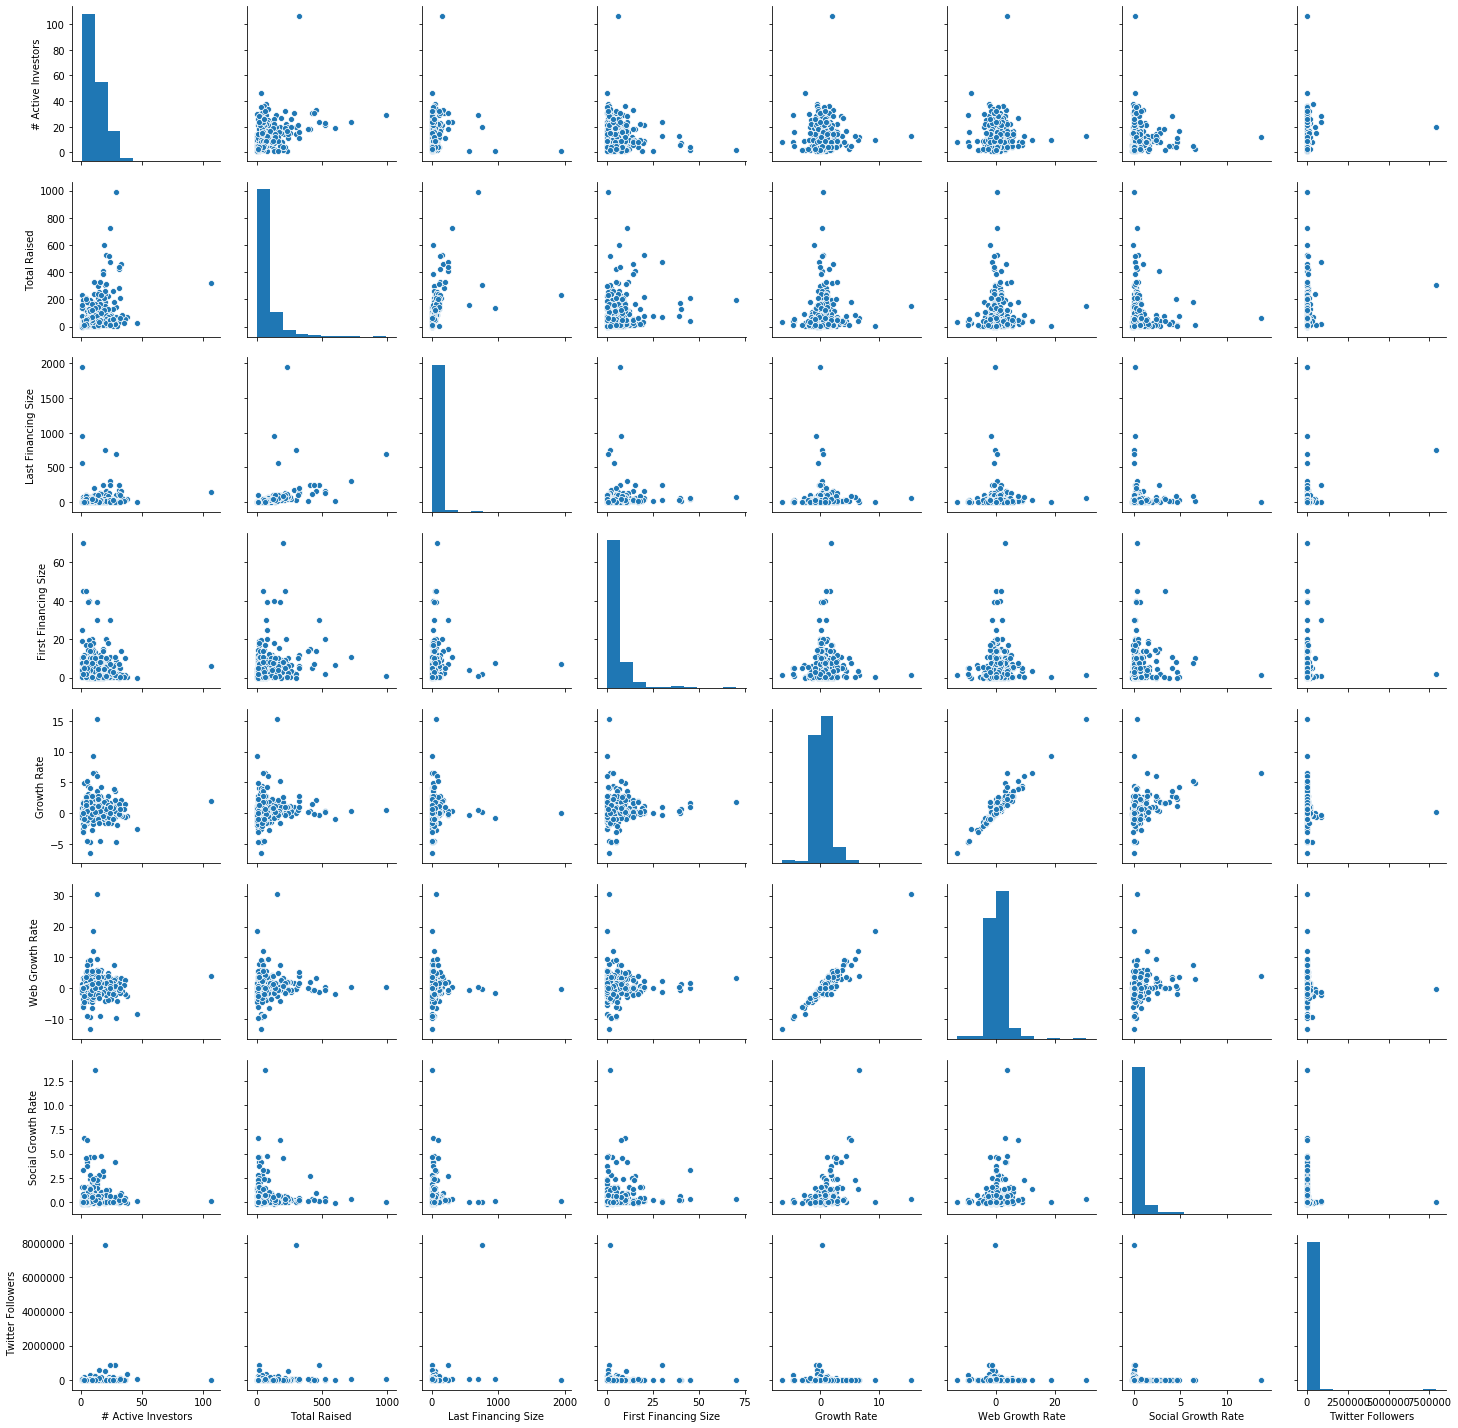

In [201]:
#checking for outliers and correlations

cols = ['# Active Investors','Total Raised','Last Financing Size','First Financing Size','Growth Rate','Web Growth Rate',
'Social Growth Rate','Twitter Followers'] 
sns.pairplot(new_data[cols])

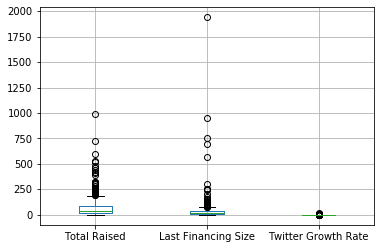

In [202]:
#boxplot 

new_data.boxplot(column=['Total Raised','Last Financing Size','Twitter Growth Rate'])

In [203]:
#smaller df to detect and remove outliers

reduced_df=new_data[['Company Name','Total Raised','Year Founded','# Active Investors','Growth Rate',
       'Growth Rate Percentile', 'Web Growth Rate',
       'Web Growth Rate Percentile', 'Social Growth Rate',
       'Social Growth Rate Percentile', 'Twitter Growth Rate',
       'Twitter Growth Rate Percentile', 'Twitter Followers','Last Financing Size', 'First Financing Size']]
reduced_df

,Company Name,Total Raised,Year Founded,# Active Investors,Growth Rate,Growth Rate Percentile,Web Growth Rate,Web Growth Rate Percentile,Social Growth Rate,Social Growth Rate Percentile,Twitter Growth Rate,Twitter Growth Rate Percentile,Twitter Followers,Last Financing Size,First Financing Size
0,3Bar Biologics,2.10,2013.0,10.0,9.29,100.0,18.58,100.0,0.00,22.0,0.00,22.0,48.0,0.60,0.10
1,3D Hubs,29.52,2013.0,11.0,0.08,89.0,0.12,94.0,0.05,58.0,0.11,73.0,29378.0,18.00,0.02
2,4INFO,76.09,2004.0,14.0,-1.12,10.0,-2.31,7.0,0.07,62.0,0.07,67.0,2349.0,1.50,0.42
3,8i,42.22,2014.0,29.0,1.66,98.0,3.27,99.0,0.04,56.0,0.06,65.0,6722.0,26.74,1.00
4,908 Devices,74.00,2012.0,29.0,0.20,92.0,0.00,23.0,0.39,91.0,0.39,92.0,581.0,17.50,8.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,nCino,125.11,2012.0,9.0,0.85,97.0,1.53,98.0,0.53,94.0,0.50,94.0,2170.0,51.50,7.54
442,toBe Marketing,5.90,2015.0,2.0,0.00,26.0,0.00,23.0,0.00,22.0,0.00,22.0,37.0,4.00,1.90
443,uAvionix,12.00,2014.0,3.0,-0.96,11.0,-2.56,7.0,0.63,95.0,0.63,96.0,653.0,7.00,5.00
444,uBeam,54.99,2011.0,26.0,-0.98,11.0,-1.92,9.0,-0.04,12.0,-0.04,15.0,5048.0,34.39,3.20


In [204]:
#setting the index so we avoid the errors
reduced_df=reduced_df.set_index('Company Name')

In [205]:
#getting the z-score 
z = np.abs(stats.zscore(reduced_df))
print(z)

[[0.68067198 0.49815251 0.25001847 ... 0.08920347 0.31874265 0.65710526]
 [0.40957489 0.49815251 0.13917529 ... 0.01210669 0.17241329 0.66888657]
 [0.05085514 1.58909612 0.19335424 ... 0.08315507 0.31117389 0.60998001]
 ...
 [0.58279229 0.73006903 1.02592071 ... 0.08761317 0.26492036 0.06450004]
 [0.15775713 0.03431948 1.52347237 ... 0.07606048 0.03457777 0.20057946]
 [0.10842181 0.49815251 2.18853143 ... 0.02841451 0.27795545 0.60261669]]


In [206]:
#setting the threshold and printing outliers

threshold = 3
print(np.where(z > 3))

(array([  0,   0,  26,  52,  52,  55,  55,  55,  65,  69,  76,  76,  78,
        97, 100, 137, 142, 149, 153, 156, 156, 158, 165, 165, 167, 167,
       172, 180, 180, 191, 191, 192, 192, 197, 197, 199, 199, 222, 222,
       246, 251, 252, 252, 283, 283, 288, 290, 294, 304, 304, 307, 311,
       316, 316, 320, 333, 355, 377, 381, 381, 381, 392, 395, 404, 409,
       409, 418, 418, 423, 423, 426, 434, 434]), array([ 3,  5, 12,  3,  5,  3,  7,  9, 13,  0,  0,  9, 13,  0,  7,  9,  2,
        0,  2,  7,  9,  7, 11, 12,  3,  5,  1,  7,  9,  3,  5,  0, 12,  3,
        5,  3,  5,  7,  9,  1,  0,  0, 13,  3,  5, 13, 13,  0,  9, 13,  1,
        0,  7,  9,  1,  0, 13,  0,  3,  7,  9, 13, 12, 13,  7,  9,  7,  9,
        3,  5, 12,  3,  5]))


In [207]:
#removing the outliers
reduced_df = reduced_df[(z < 3).all(axis=1)]

In [208]:
#cleaned df 
reduced_df

,Total Raised,Year Founded,# Active Investors,Growth Rate,Growth Rate Percentile,Web Growth Rate,Web Growth Rate Percentile,Social Growth Rate,Social Growth Rate Percentile,Twitter Growth Rate,Twitter Growth Rate Percentile,Twitter Followers,Last Financing Size,First Financing Size
Company Name,,,,,,,,,,,,,,
3D Hubs,29.52,2013.0,11.0,0.08,89.0,0.12,94.0,0.05,58.0,0.11,73.0,29378.0,18.00,0.02
4INFO,76.09,2004.0,14.0,-1.12,10.0,-2.31,7.0,0.07,62.0,0.07,67.0,2349.0,1.50,0.42
8i,42.22,2014.0,29.0,1.66,98.0,3.27,99.0,0.04,56.0,0.06,65.0,6722.0,26.74,1.00
908 Devices,74.00,2012.0,29.0,0.20,92.0,0.00,23.0,0.39,91.0,0.39,92.0,581.0,17.50,8.49
ART19,8.50,2011.0,7.0,0.11,90.0,-0.67,18.0,0.90,97.0,1.19,99.0,938.0,8.50,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nCino,125.11,2012.0,9.0,0.85,97.0,1.53,98.0,0.53,94.0,0.50,94.0,2170.0,51.50,7.54
toBe Marketing,5.90,2015.0,2.0,0.00,26.0,0.00,23.0,0.00,22.0,0.00,22.0,37.0,4.00,1.90
uAvionix,12.00,2014.0,3.0,-0.96,11.0,-2.56,7.0,0.63,95.0,0.63,96.0,653.0,7.00,5.00


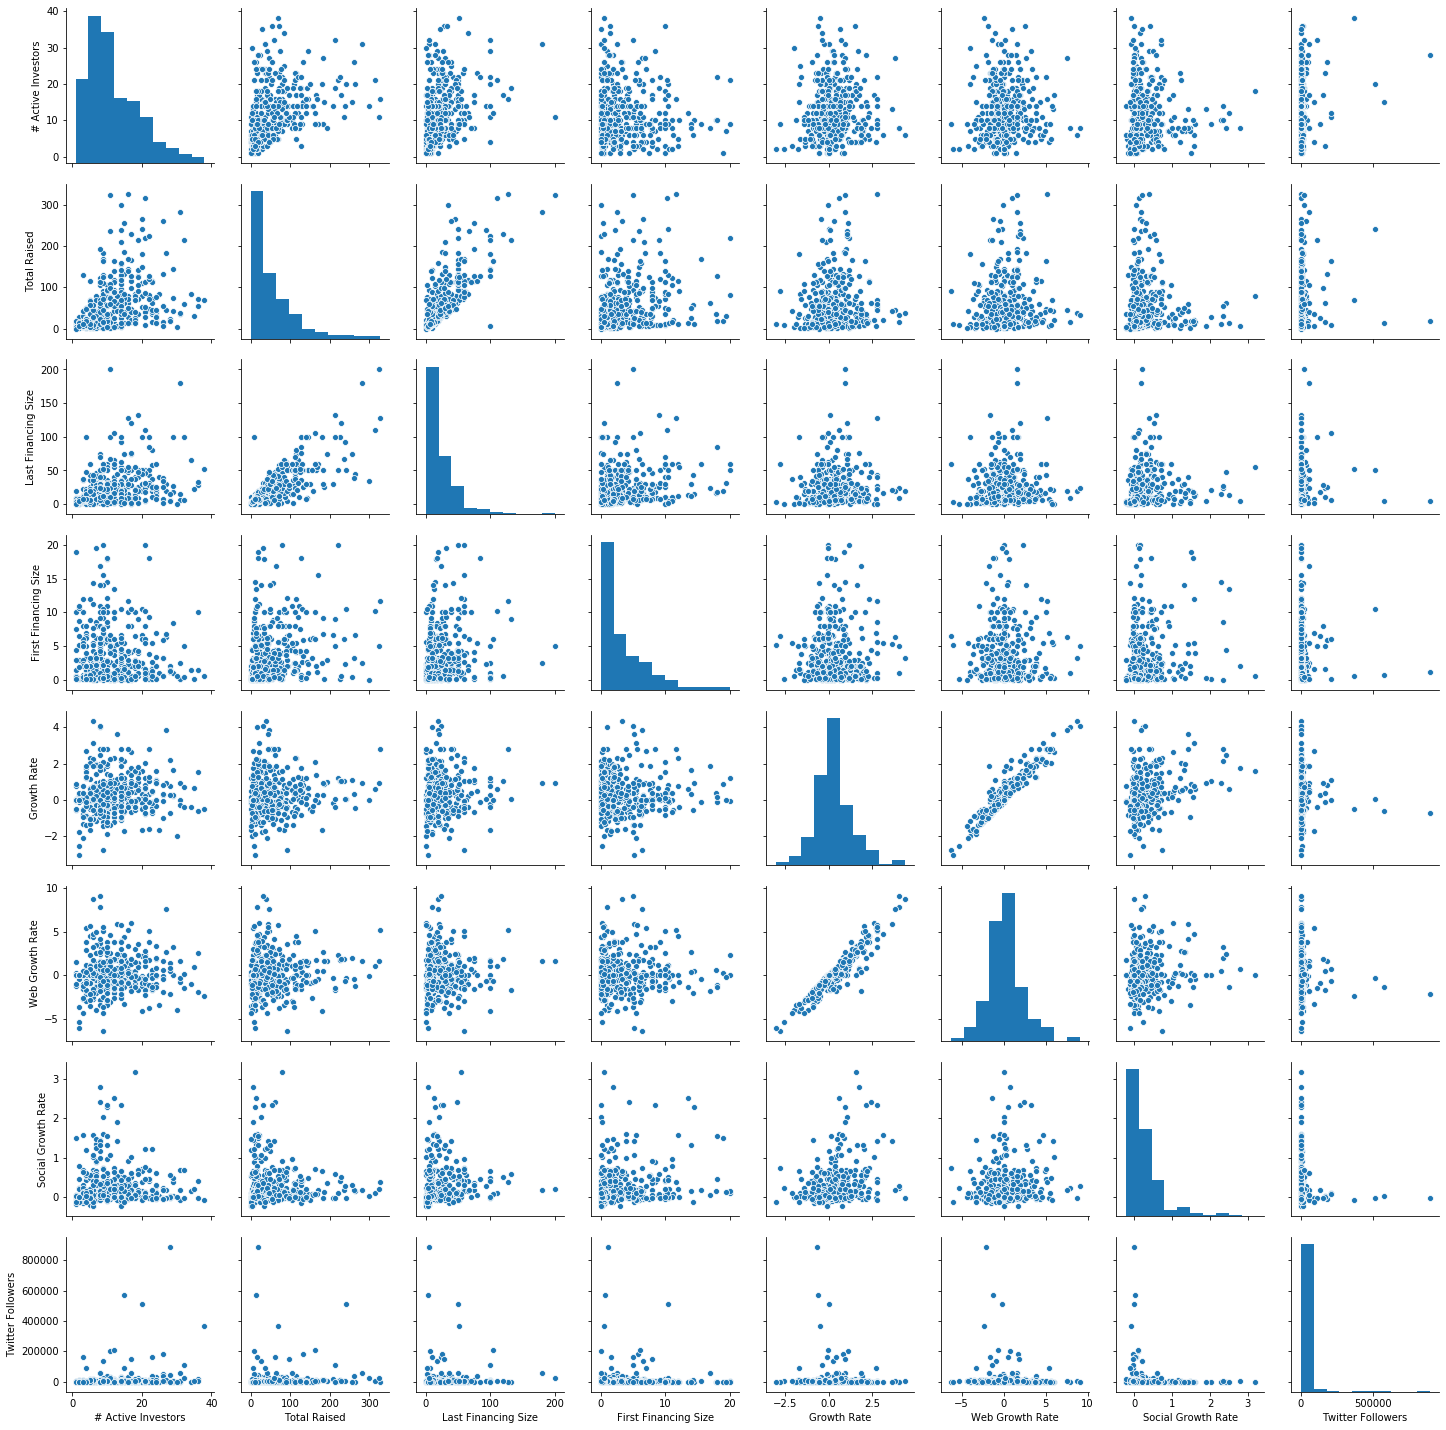

In [91]:
#looking for possible correlations after removing the outliers
cols = ['# Active Investors','Total Raised','Last Financing Size','First Financing Size','Growth Rate','Web Growth Rate',
'Social Growth Rate','Twitter Followers'] 
sns.pairplot(reduced_df[cols])

In [173]:
#dropping repeated columns
new_merge=reduced_df.merge(new_data, on='Company Name')
new_merge=new_merge.drop(['# Active Investors_y','Total Raised_y','Last Financing Size_y','First Financing Size_y','Growth Rate_y','Growth Rate Percentile_y','Web Growth Rate_y','Web Growth Rate Percentile_y',
'Social Growth Rate_y','Social Growth Rate Percentile_y','Twitter Followers_y',    'Twitter Growth Rate_y', 'Twitter Growth Rate Percentile_y'], axis=1)

In [217]:
#merging reduced df without outliers with the old df

new_merge=reduced_df.merge(new_data, on='Company Name')
new_merge.columns

Index(['Company Name', 'Total Raised_x', 'Year Founded_x',
       '# Active Investors_x', 'Growth Rate_x', 'Growth Rate Percentile_x',
       'Web Growth Rate_x', 'Web Growth Rate Percentile_x',
       'Social Growth Rate_x', 'Social Growth Rate Percentile_x',
       'Twitter Growth Rate_x', 'Twitter Growth Rate Percentile_x',
       'Twitter Followers_x', 'Last Financing Size_x',
       'First Financing Size_x', 'Programming Languages',
       'Software Applications', 'Primary Industry Code',
       'Primary Industry Sector', 'Primary Industry Group', 'Verticals',
       'Total Raised_y', 'Year Founded_y', 'HQ Location', 'HQ Country',
       'HQ Global Region', 'Active Investors', '# Active Investors_y',
       'First Financing Date', 'First Financing Size_y',
       'First Financing Deal Type', 'First Financing Deal Class',
       'Last Financing Date', 'Last Financing Size_y',
       'Last Financing Deal Type', 'Last Financing Deal Class',
       'Growth Rate_y', 'Growth Rate Percen

In [218]:
new_merge=new_merge.drop(['# Active Investors_y','Total Raised_y','Last Financing Size_y','First Financing Size_y','Growth Rate_y','Growth Rate Percentile_y','Web Growth Rate_y','Web Growth Rate Percentile_y',
'Social Growth Rate_y','Social Growth Rate Percentile_y','Twitter Followers_y','Twitter Growth Rate_y', 'Twitter Growth Rate Percentile_y','Year Founded_y'], axis=1)

In [219]:
new_merge.columns

Index(['Company Name', 'Total Raised_x', 'Year Founded_x',
       '# Active Investors_x', 'Growth Rate_x', 'Growth Rate Percentile_x',
       'Web Growth Rate_x', 'Web Growth Rate Percentile_x',
       'Social Growth Rate_x', 'Social Growth Rate Percentile_x',
       'Twitter Growth Rate_x', 'Twitter Growth Rate Percentile_x',
       'Twitter Followers_x', 'Last Financing Size_x',
       'First Financing Size_x', 'Programming Languages',
       'Software Applications', 'Primary Industry Code',
       'Primary Industry Sector', 'Primary Industry Group', 'Verticals',
       'HQ Location', 'HQ Country', 'HQ Global Region', 'Active Investors',
       'First Financing Date', 'First Financing Deal Type',
       'First Financing Deal Class', 'Last Financing Date',
       'Last Financing Deal Type', 'Last Financing Deal Class'],
      dtype='object')

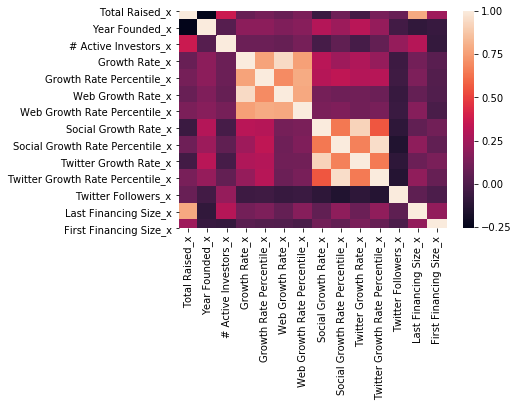

In [221]:
#heatmap correlations
sns.heatmap(new_merge.corr())

In [222]:
new_merge.to_csv('StartupInvestments.csv')